In [1]:
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import gpxpy
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

# Define a Cartopy 'ordinary' lat-lon coordinate reference system.
crs_latlon = ccrs.PlateCarree()

In [3]:
with open('/home/jseddon/python/elinca/yblog-1589101179046.gpx') as fh:
    gpx = gpxpy.parse(fh)
data = gpx.tracks[0].segments[0].points

In [4]:
print(data[0])
print(data[-1])

[trkpt:55.94507999999999,-4.746780000000001@8.0@2013-09-04 16:19:01+00:00]
[trkpt:58.20921999999999,-6.390119999999996@7.0@2014-05-24 09:59:12+00:00]


In [5]:
print(type(data[0]))
ra = data[0]

<class 'gpxpy.gpx.GPXTrackPoint'>


In [6]:
mslp = iris.load_cube('/home/jseddon/python/elinca/era5/ecmwf-era5_oper_an_sfc_201309040000.msl.nc')

In [7]:
print(mslp)

air_pressure_at_mean_sea_level / (Pa) (time: 1; latitude: 721; longitude: 1440)
     Dimension coordinates:
          time                             x            -               -
          latitude                         -            x               -
          longitude                        -            -               x
     Attributes:
          Conventions: CF-1.6
          history: 2019-03-27 00:32:18 GMT by grib_to_netcdf-2.9.2: grib_to_netcdf ecmwf-era5_oper_an_sfc_201309040000.msl.grb...


/home/jseddon/software/miniconda3/envs/elinca/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


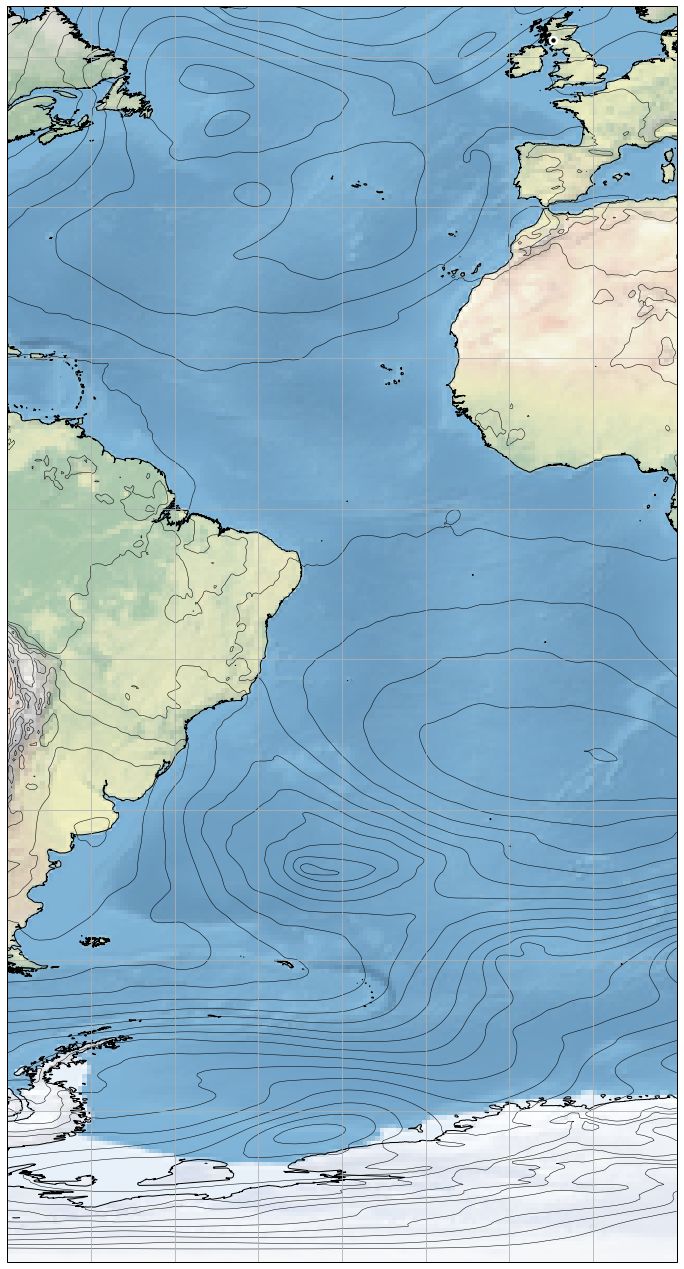

In [8]:
mslp_atl = mslp.intersection(longitude=(-90, 10))
mslp_atl.convert_units('hPa')
plt.figure(figsize=(12, 25))
iplt.contour(mslp_atl[0], 20,
                 linewidths=0.5, colors='black', linestyles='-')
ax = plt.gca()
ax.set_extent((-70.0, 10.0, -90.0, 60.0), crs=crs_latlon)
ax.stock_img()
ax.coastlines(resolution='10m')
ax.gridlines()
plt.plot(ra.longitude, ra.latitude, marker='o', markersize=7.0, markeredgewidth=2.5,
                 markerfacecolor='black', markeredgecolor='white',
                 transform=crs_latlon)

In [9]:
# chose every nth value
nth = 8
u = iris.load_cube('/home/jseddon/python/elinca/era5/ecmwf-era5_oper_an_sfc_201309040000.10u.nc')
u_atl = u.intersection(longitude=(-90, 10))
u_atl_2deg = u_atl[0, ::nth, ::nth]
u_atl_2deg.convert_units('knot')
v = iris.load_cube('/home/jseddon/python/elinca/era5/ecmwf-era5_oper_an_sfc_201309040000.10u.nc')
v_atl = v.intersection(longitude=(-90, 10))
v_atl_2deg = v_atl[0, ::nth, ::nth]
v_atl_2deg.convert_units('knot')

In [10]:
print(u_atl_2deg)
u_atl_2deg.units

10 metre U wind component / (knot)  (latitude: 91; longitude: 51)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          time: 2013-09-04 00:00:00
     Attributes:
          Conventions: CF-1.6
          history: 2019-03-27 00:32:04 GMT by grib_to_netcdf-2.9.2: grib_to_netcdf ecmwf-era5_oper_an_sfc_201309040000.10u.grb...


Unit('knot')

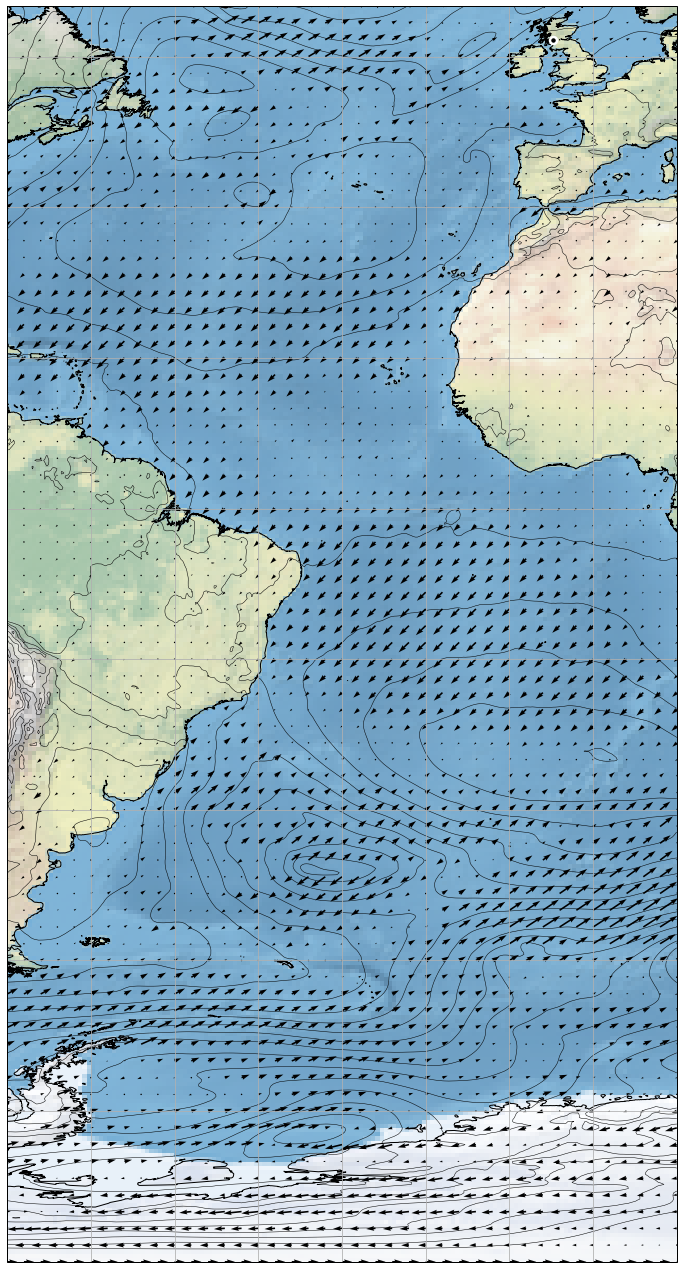

In [11]:
plt.figure(figsize=(12, 25))
iplt.quiver(u_atl_2deg, v_atl_2deg)
iplt.contour(mslp_atl[0], 20,
                 linewidths=0.5, colors='black', linestyles='-')
ax = plt.gca()
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70.0, 10.0, -90.0, 60.0), crs=crs_latlon)
ax.stock_img()
ax.coastlines(resolution='10m')
ax.gridlines()
plt.plot(ra.longitude, ra.latitude, marker='o', markersize=7.0, markeredgewidth=2.5,
                 markerfacecolor='black', markeredgecolor='white',
                 transform=crs_latlon)

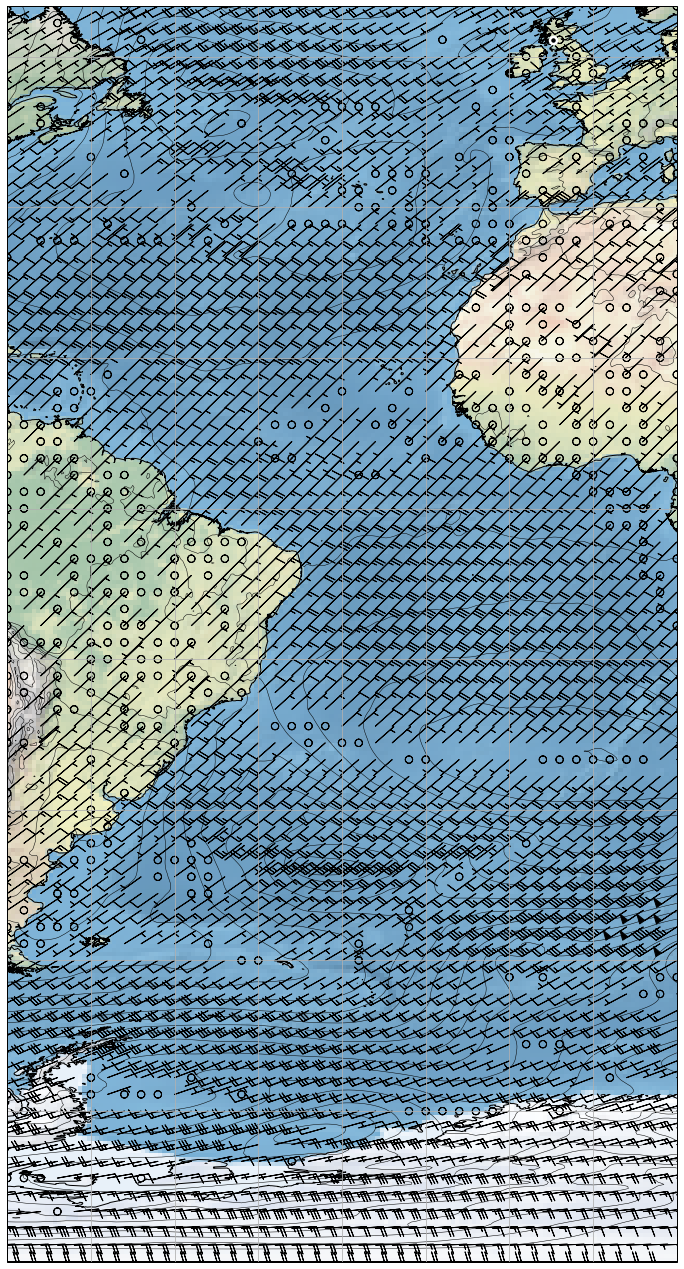

In [12]:
plt.figure(figsize=(12, 25))
iplt.barbs(u_atl_2deg, v_atl_2deg)
iplt.contour(mslp_atl[0], 20,
                 linewidths=0.5, colors='black', linestyles='-')
ax = plt.gca()
# ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70.0, 10.0, -90.0, 60.0), crs=crs_latlon)
ax.stock_img()
ax.coastlines(resolution='10m')
ax.gridlines()
plt.plot(ra.longitude, ra.latitude, marker='o', markersize=7.0, markeredgewidth=2.5,
                 markerfacecolor='black', markeredgecolor='white',
                 transform=crs_latlon)